# Projet - Seattle Building Energy

L'objectif du projet est de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation à partir de relevés de la ville seattle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_columns', None) #affiche toutes les colonnes

In [3]:
df = pd.read_csv('2016-building-energy-benchmarking.csv')

In [4]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [5]:
df.shape

(3376, 46)

In [6]:
df.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [10]:
df.describe(include = "all")

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3376,3376,3376,3376,3376,3376,3360.000000,3376,3376.000000,3376,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3367,3356,3.356000e+03,1679,1679.000000,596,596.000000,119,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3376,0.0,3376,32,3367.000000,3367.000000
unique,NaN,NaN,8,24,3362,3354,1,1,NaN,3268,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,466,56,NaN,50,NaN,44,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,4,2,NaN,NaN
top,NaN,NaN,NonResidential,Low-Rise Multifamily,Northgate Plaza,2600 SW Barton St,Seattle,WA,NaN,1625049001,NaN,DOWNTOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,NaN,Parking,NaN,Retail Store,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Compliant,Low outlier,NaN,NaN
freq,NaN,NaN,1460,987,3,4,3376,3376,NaN,8,NaN,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,866,1667,NaN,976,NaN,110,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3263,NaN,3211,23,NaN,NaN
mean,21208.991114,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98116.949107,NaN,4.439277,NaN,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,NaN,NaN,7.917764e+04,NaN,28444.075817,NaN,11738.675166,NaN,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,NaN,NaN,NaN,119.723971,1.175916
std,12223.757015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.615205,NaN,2.120625,NaN,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,NaN,NaN,2.017034e+05,NaN,54392.917928,NaN,29331.199286,NaN,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,NaN,NaN,NaN,538.832227,1.821452
min,1.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98006.000000,NaN,1.000000,NaN,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,NaN,NaN,5.656000e+03,NaN,0.000000,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,3.000000,NaN,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,NaN,NaN,2.509475e+04,NaN,5000.000000,NaN,2239.000000,NaN,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,9.495000,0.210000
50%,23112.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98115.000000,NaN,4.000000,NaN,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,NaN,NaN,3.989400e+04,NaN,10664.000000,NaN,5043.000000,NaN,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,NaN,NaN,NaN,33.920000,0.610000
75%,25994.250000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98122.000000,NaN,7.000000,NaN,47.657115

# Exploration

In [11]:
df["OSEBuildingID"].value_counts()

OSEBuildingID
1        1
25062    1
24943    1
24948    1
24955    1
        ..
20985    1
20986    1
20987    1
20988    1
50226    1
Name: count, Length: 3376, dtype: int64

In [12]:
df["DataYear"].value_counts()

DataYear
2016    3376
Name: count, dtype: int64

In [13]:
df["BuildingType"].value_counts()

BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64

In [14]:
df["PrimaryPropertyType"].value_counts()

PrimaryPropertyType
Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Name: count, dtype: int64

In [15]:
df["Address"].value_counts()

Address
2600 SW Barton St              4
2203 Airport Way S             4
309 South Cloverdale Street    4
516 1st Ave W                  2
201 Thomas St.                 2
                              ..
655 South Orcas Street         1
661 South Orcas Street         1
4000 aurora ave n              1
3316 Fuhrman Ave E             1
2820 S Myrtle St               1
Name: count, Length: 3354, dtype: int64

In [16]:
df["City"].value_counts()

City
Seattle    3376
Name: count, dtype: int64

In [17]:
df["State"].value_counts()

State
WA    3376
Name: count, dtype: int64

In [18]:
df["ZipCode"].value_counts()

ZipCode
98109.0    294
98104.0    251
98122.0    243
98101.0    230
98105.0    191
98121.0    186
98134.0    186
98102.0    169
98119.0    167
98103.0    161
98125.0    152
98108.0    129
98115.0    129
98133.0    124
98107.0    101
98144.0     99
98116.0     93
98118.0     85
98199.0     70
98112.0     68
98126.0     64
98106.0     50
98117.0     31
98136.0     28
98195.0     10
98146.0      6
98178.0      4
98155.0      4
98111.0      3
98154.0      2
98013.0      2
98124.0      2
98168.0      2
98164.0      2
98177.0      2
98040.0      1
98020.0      1
98204.0      1
98272.0      1
98127.0      1
98113.0      1
98198.0      1
98011.0      1
98165.0      1
98006.0      1
98114.0      1
98028.0      1
98012.0      1
98053.0      1
98181.0      1
98185.0      1
98191.0      1
98033.0      1
98070.0      1
98145.0      1
Name: count, dtype: int64

In [19]:
df["TaxParcelIdentificationNumber"].value_counts()

TaxParcelIdentificationNumber
1625049001    8
3224049012    5
0925049346    5
0002400002    5
3624039009    4
             ..
1972202635    1
1977200970    1
1977201050    1
1977201055    1
7857002030    1
Name: count, Length: 3268, dtype: int64

In [20]:
df["CouncilDistrictCode"].value_counts()

CouncilDistrictCode
7    1037
3     596
2     509
4     367
5     338
1     282
6     247
Name: count, dtype: int64

In [21]:
df["Neighborhood"].value_counts()
# doublon minuscule/majuscule

Neighborhood
DOWNTOWN                  573
EAST                      453
MAGNOLIA / QUEEN ANNE     423
GREATER DUWAMISH          375
NORTHEAST                 280
LAKE UNION                251
NORTHWEST                 210
SOUTHWEST                 166
NORTH                     145
BALLARD                   126
CENTRAL                   107
SOUTHEAST                  95
DELRIDGE                   80
North                      42
Central                    27
Northwest                  11
Ballard                     7
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: count, dtype: int64

In [22]:
df["Latitude"].value_counts()

Latitude
47.66246    9
47.61598    7
47.62208    6
47.62395    5
47.61543    5
           ..
47.73255    1
47.72305    1
47.72471    1
47.72435    1
47.53939    1
Name: count, Length: 2876, dtype: int64

In [23]:
df["Longitude"].value_counts()

Longitude
-122.29898    8
-122.35398    7
-122.32468    6
-122.33369    6
-122.33379    6
             ..
-122.35435    1
-122.35592    1
-122.35516    1
-122.35289    1
-122.29536    1
Name: count, Length: 2656, dtype: int64

In [24]:
df["YearBuilt"].value_counts()

YearBuilt
2000    72
2014    67
1989    67
2008    66
1988    64
        ..
1942     3
1939     2
1944     2
1936     1
1935     1
Name: count, Length: 113, dtype: int64

<Axes: >

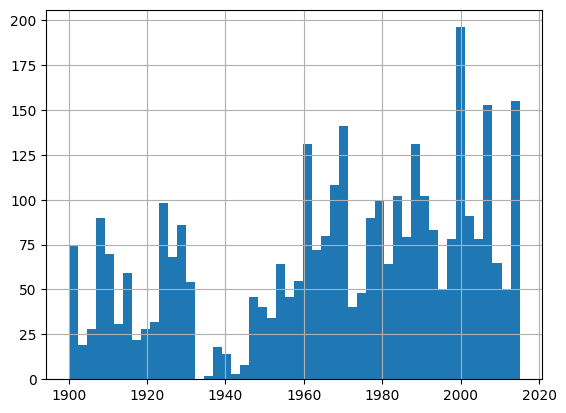

In [25]:
df.YearBuilt.hist(bins = 50)

In [26]:
df["NumberofBuildings"].value_counts()

NumberofBuildings
1.0      3175
0.0        92
2.0        37
3.0        22
4.0        12
5.0        10
6.0         5
8.0         3
10.0        2
14.0        2
9.0         2
7.0         1
11.0        1
16.0        1
23.0        1
27.0        1
111.0       1
Name: count, dtype: int64

In [27]:
df["NumberofFloors"].value_counts()

NumberofFloors
4     692
3     692
1     466
2     439
6     306
5     295
7     148
8      64
10     32
11     32
12     21
13     21
9      18
0      16
14     13
17      9
16      7
24      7
18      7
15      7
23      7
19      6
26      6
42      6
33      6
20      5
27      5
21      5
25      5
22      4
29      3
41      3
37      2
34      2
31      2
36      2
28      2
32      1
39      1
76      1
38      1
99      1
55      1
56      1
30      1
46      1
63      1
49      1
47      1
40      1
Name: count, dtype: int64

In [28]:
df["PropertyGFATotal"].value_counts()

PropertyGFATotal
36000     9
25920     8
28800     7
21600     7
24000     6
         ..
21118     1
206126    1
248225    1
35512     1
18258     1
Name: count, Length: 3195, dtype: int64

In [29]:
df["PropertyGFAParking"].value_counts()

PropertyGFAParking
0         2872
13320        3
10800        2
20416        2
30000        2
          ... 
16221        1
39902        1
36583        1
111774       1
2580         1
Name: count, Length: 496, dtype: int64

In [30]:
df["PropertyGFABuilding(s)"].value_counts()

PropertyGFABuilding(s)
36000    9
25920    8
21600    7
28800    7
24000    6
        ..
3636     1
25521    1
23190    1
31248    1
18258    1
Name: count, Length: 3193, dtype: int64

In [31]:
df["ListOfAllPropertyUseTypes"].value_counts()

ListOfAllPropertyUseTypes
Multifamily Housing                                                                       866
Multifamily Housing, Parking                                                              464
Office                                                                                    139
K-12 School                                                                               135
Office, Parking                                                                           120
                                                                                         ... 
Other, Parking, Restaurant, Retail Store                                                    1
Non-Refrigerated Warehouse, Other, Parking, Retail Store                                    1
Data Center, Non-Refrigerated Warehouse, Office, Retail Store                               1
Data Center, Medical Office, Office, Parking, Restaurant                                    1
Fitness Center/Health Club/Gym, Of

In [32]:
df["LargestPropertyUseTypeGFA"].value_counts()

LargestPropertyUseTypeGFA
24000.0    9
22000.0    9
30000.0    8
21600.0    8
20000.0    7
          ..
56144.0    1
37885.0    1
23867.0    1
24330.0    1
8271.0     1
Name: count, Length: 3122, dtype: int64

In [33]:
df["SecondLargestPropertyUseType"].value_counts()

SecondLargestPropertyUseType
Parking                                                 976
Office                                                  215
Retail Store                                            155
Other                                                    59
Restaurant                                               40
Non-Refrigerated Warehouse                               33
Multifamily Housing                                      18
Fitness Center/Health Club/Gym                           17
Supermarket/Grocery Store                                14
Data Center                                              13
Other - Services                                         12
Medical Office                                           11
Swimming Pool                                            10
Laboratory                                                8
Distribution Center                                       7
Bank Branch                                               7
Other - Ent

In [34]:
df["SecondLargestPropertyUseTypeGFA"].value_counts()

SecondLargestPropertyUseTypeGFA
0.0        126
5000.0      14
6000.0      12
7200.0      12
15000.0     12
          ... 
7400.0       1
2840.0       1
14373.0      1
16826.0      1
6501.0       1
Name: count, Length: 1352, dtype: int64

In [35]:
df["ThirdLargestPropertyUseType"].value_counts()

ThirdLargestPropertyUseType
Retail Store                                            110
Office                                                  105
Parking                                                  71
Restaurant                                               56
Other                                                    49
Swimming Pool                                            29
Non-Refrigerated Warehouse                               18
Medical Office                                           17
Data Center                                              14
Multifamily Housing                                      12
Social/Meeting Hall                                      11
Food Service                                             11
Other - Restaurant/Bar                                    9
Pre-school/Daycare                                        8
Personal Services (Health/Beauty, Dry Cleaning, etc)      6
Fitness Center/Health Club/Gym                            6
Other - Ente

In [36]:
df["ThirdLargestPropertyUseTypeGFA"].value_counts()

ThirdLargestPropertyUseTypeGFA
0.0        48
6000.0      7
5000.0      6
3000.0      5
2000.0      5
           ..
4006.0      1
17000.0     1
20740.0     1
6540.0      1
1108.0      1
Name: count, Length: 501, dtype: int64

In [37]:
df["YearsENERGYSTARCertified"].value_counts()

YearsENERGYSTARCertified
2016                                    14
20172016                                 8
2017                                     7
20162015                                 6
2014                                     6
                                        ..
2012201020072006                         1
201620152014201320112010200920072000     1
201220092008                             1
201620152014201320092008                 1
20162015201020092008                     1
Name: count, Length: 65, dtype: int64

In [38]:
df["ENERGYSTARScore"].value_counts()

ENERGYSTARScore
100.0    109
98.0      72
96.0      64
89.0      58
93.0      57
        ... 
36.0       8
35.0       8
22.0       8
9.0        5
4.0        5
Name: count, Length: 100, dtype: int64

In [39]:
df["SiteEUI(kBtu/sf)"].value_counts()

SiteEUI(kBtu/sf)
28.799999     17
24.700001     17
0.000000      16
24.200001     16
32.000000     15
              ..
9.900000       1
108.900002     1
77.599998      1
63.299999      1
438.200012     1
Name: count, Length: 1085, dtype: int64

In [40]:
df["SiteEUIWN(kBtu/sf)"].value_counts()

SiteEUIWN(kBtu/sf)
0.000000      29
29.500000     17
30.799999     15
31.600000     14
29.000000     14
              ..
145.100006     1
130.399994     1
80.699997      1
122.300003     1
460.100006     1
Name: count, Length: 1105, dtype: int64

In [41]:
df["SourceEUI(kBtu/sf)"].value_counts()

SourceEUI(kBtu/sf)
0.000000      24
83.699997      9
68.099998      9
95.000000      8
87.699997      8
              ..
182.899994     1
174.699997     1
104.300003     1
167.399994     1
744.799988     1
Name: count, Length: 1648, dtype: int64

In [42]:
df["SourceEUIWN(kBtu/sf)"].value_counts()

SourceEUIWN(kBtu/sf)
0.000000      36
73.599998      9
87.300003      9
75.500000      8
104.599998     8
              ..
131.800003     1
229.800003     1
53.099998      1
44.400002      1
767.799988     1
Name: count, Length: 1694, dtype: int64

In [43]:
df["SiteEnergyUse(kBtu)"].value_counts()

SiteEnergyUse(kBtu)
0.000000e+00    18
1.331470e+06     1
4.213894e+05     1
1.221342e+07     1
6.714540e+06     1
                ..
1.275236e+06     1
3.629066e+06     1
1.126157e+06     1
6.458022e+06     1
1.152896e+06     1
Name: count, Length: 3354, dtype: int64

In [44]:
df["SiteEnergyUseWN(kBtu)"].value_counts()

SiteEnergyUseWN(kBtu)
0.000          29
2127889.250     2
7456910.000     1
2266028.750     1
1386445.375     1
               ..
1214408.750     1
6853384.500     1
2303810.500     1
778702.125      1
1293722.375     1
Name: count, Length: 3341, dtype: int64

In [45]:
df["SteamUse(kBtu)"].value_counts()

SteamUse(kBtu)
0.000000e+00    3237
4.505223e+05       1
6.820476e+05       1
5.473370e+06       1
7.620328e+05       1
                ... 
1.619967e+06       1
8.829835e+05       1
2.154978e+06       1
1.807318e+05       1
8.498524e+07       1
Name: count, Length: 131, dtype: int64

In [46]:
df["Electricity(kWh)"].value_counts()

Electricity(kWh)
0.000000e+00    14
2.390116e+05     2
3.178414e+05     2
1.156514e+06     1
4.003780e+04     1
                ..
2.888210e+05     1
6.524030e+04     1
1.567127e+05     1
9.729410e+04     1
1.267744e+05     1
Name: count, Length: 3352, dtype: int64

In [47]:
df["Electricity(kBtu)"].value_counts()

Electricity(kBtu)
0.000000e+00    14
8.155080e+05     2
8.041940e+05     2
1.084475e+06     2
3.946027e+06     1
                ..
1.064725e+06     1
9.854570e+05     1
2.226000e+05     1
5.347040e+05     1
4.325542e+05     1
Name: count, Length: 3351, dtype: int64

In [48]:
df["NaturalGas(therms)"].value_counts()

NaturalGas(therms)
0.000000        1258
2268.460205        2
12764.529300       1
2486.159912        1
119.889992         1
                ... 
16445.039060       1
10952.600590       1
5055.829590        1
9792.619141        1
7203.419922        1
Name: count, Length: 2109, dtype: int64

In [49]:
df["Electricity(kWh)"].value_counts()

Electricity(kWh)
0.000000e+00    14
2.390116e+05     2
3.178414e+05     2
1.156514e+06     1
4.003780e+04     1
                ..
2.888210e+05     1
6.524030e+04     1
1.567127e+05     1
9.729410e+04     1
1.267744e+05     1
Name: count, Length: 3352, dtype: int64

In [50]:
df["NaturalGas(kBtu)"].value_counts()

NaturalGas(kBtu)
0.000000e+00    1258
2.268460e+05       2
1.276453e+06       1
2.486160e+05       1
1.198900e+04       1
                ... 
1.644504e+06       1
1.095260e+06       1
5.055830e+05       1
9.792620e+05       1
7.203420e+05       1
Name: count, Length: 2109, dtype: int64

In [51]:
df["DefaultData"].value_counts()

DefaultData
False    3263
True      113
Name: count, dtype: int64

In [52]:
df["Comments"].value_counts()
df["Comments"].unique()

array([nan])

In [53]:
df["ComplianceStatus"].value_counts()

ComplianceStatus
Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: count, dtype: int64

In [54]:
df["Outlier"].value_counts()

Outlier
Low outlier     23
High outlier     9
Name: count, dtype: int64

In [55]:
df["TotalGHGEmissions"].value_counts()

TotalGHGEmissions
0.00      9
3.95      7
5.46      6
4.20      6
4.76      5
         ..
199.79    1
92.58     1
47.70     1
90.31     1
41.27     1
Name: count, Length: 2818, dtype: int64

In [56]:
df["GHGEmissionsIntensity"].value_counts()

GHGEmissionsIntensity
0.17     99
0.15     99
0.16     96
0.18     86
0.19     78
         ..
2.54      1
6.55      1
3.58      1
2.45      1
16.99     1
Name: count, Length: 511, dtype: int64

In [57]:
# A garder :
#'BuildingType', 'PrimaryPropertyType','PropertyName',
#'CouncilDistrictCode', 'Neighborhood',
#'YearBuilt', 'NumberofBuildings','NumberofFloors', 

#'PropertyGFATotal', 'PropertyGFAParking','PropertyGFABuilding(s)', 

#'ListOfAllPropertyUseTypes','LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
#'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
#'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',

#'ENERGYSTARScore',

#'SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
#'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
#'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)','NaturalGas(kBtu)',

#'TotalGHGEmissions', 'GHGEmissionsIntensity']

# Nettoyage

In [58]:
# Aide
#ligne #df_final.drop(df_final[df_final["ferie"] == 1].index, inplace = True)
#colonne #df_final.drop(["ferie"], axis = 1, inplace = True)

In [59]:
df_final = df.copy()

In [60]:
# Sélection des non-residential (à garder : 'NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus', 'Nonresidential WA')
df_final.drop(df_final[df_final["BuildingType"] == 'Multifamily LR (1-4)'].index, inplace = True)
df_final.drop(df_final[df_final["BuildingType"] == 'Multifamily MR (5-9)'].index, inplace = True)
df_final.drop(df_final[df_final["BuildingType"] == 'Multifamily HR (10+)'].index, inplace = True)

In [61]:
# Sélection des non-residential 
df_final.drop(df_final[df_final["PrimaryPropertyType"] == "Mid-Rise Multifamily"].index, inplace = True)
df_final.drop(df_final[df_final["PrimaryPropertyType"] == "High-Rise Multifamily"].index, inplace = True)
df_final.drop(df_final[df_final["PrimaryPropertyType"] == "Low-Rise Multifamily"].index, inplace = True)
df_final.drop(df_final[df_final["PrimaryPropertyType"] == "Residence Hall"].index, inplace = True)

In [62]:
# Suppression des colonnes non nécessaires
#cols_to_drop = ['OSEBuildingID', 'City', 'State', 'DataYear', 'ZipCode', 'TaxParcelIdentificationNumber','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA','YearsENERGYSTARCertified', 'DefaultData','Comments','Outlier', 'Electricity(kWh)', 'NaturalGas(therms)']

cols_to_drop = ['OSEBuildingID', 'City', 'State', 'DataYear', 'ZipCode', 'TaxParcelIdentificationNumber','YearsENERGYSTARCertified', 
                'DefaultData','Comments','Outlier', 'Electricity(kWh)', 'NaturalGas(therms)']
df_final.drop(cols_to_drop, axis = 1, inplace = True)

In [63]:
# Suppression des index 2670, 304, 578 (beaucoup de nan)
#df_final.iloc[df_final.index == 2670]
df_final.drop(df_final[df_final.index == 2670].index, inplace = True)
df_final.drop(df_final[df_final.index == 304].index, inplace = True)
df_final.drop(df_final[df_final.index == 578].index, inplace = True)

In [64]:
# renaming PropertyGFABuilding(s) to avoid bugs for the anova
df_final.rename(columns={"PropertyGFABuilding(s)":"PropertyGFABuildings"}, inplace=True)

In [65]:
# SiteEUIWN(kBtu/sf) imputing data by the coeff diff between WN and not WN
df_final.loc[563,'SiteEUIWN(kBtu/sf)'] = df_final['SiteEUIWN(kBtu/sf)'].mean() / df_final['SiteEUI(kBtu/sf)'].mean() * 39.5
df_final.loc[563,'SiteEnergyUseWN(kBtu)'] = df_final['SiteEnergyUse(kBtu)'].mean() / df_final['SiteEnergyUseWN(kBtu)'].mean() * 5177270.5

In [66]:
# LargestPropertyUseType not filled in , imputing by research on the activity of the company
df_final.loc[1147,'LargestPropertyUseType'] = 'Hotel'
df_final.loc[2414,'LargestPropertyUseType'] = 'Office'
df_final.loc[2459,'LargestPropertyUseType'] = 'Restaurant'
df_final.loc[353,'LargestPropertyUseType'] = 'Self-Storage Facility'

In [67]:
# LargestPropertyUseTypeGFA not filled in, imputing the real GFA if one building else dividing totalGFA by number of buildings
df_final.loc[1147,'LargestPropertyUseTypeGFA'] = 61721
df_final.loc[2414,'LargestPropertyUseTypeGFA'] = 48350
df_final.loc[2459,'LargestPropertyUseTypeGFA'] = 28800
df_final.loc[353,'LargestPropertyUseTypeGFA'] = 55722

In [68]:
# noms de Neighborhood en minuscule + modif delridge
df_final.Neighborhood = df_final.Neighborhood.map(lambda x: x.lower())
df_final.loc[3370,'Neighborhood'] = 'delridge' 

df_final['Neighborhood'].unique()

array(['downtown', 'southeast', 'northeast', 'east', 'central', 'north',
       'magnolia / queen anne', 'lake union', 'greater duwamish',
       'ballard', 'northwest', 'southwest', 'delridge'], dtype=object)

In [69]:
# changement de nom : 'Nonresidential WA' en 'NonResidential'
#df_final[df_final["BuildingType"] == 'Nonresidential WA']
df_final.loc[3359,'BuildingType'] = 'NonResidential'

In [70]:
df_final.shape

(1641, 34)

In [71]:
# rename colonne SiteEnergyUse pour passer dns l'anova
df_final.rename(columns={"SiteEnergyUse(kBtu)":"SiteEnergyUse"}, inplace=True)

# Analyses bivariées/multivariées

In [72]:
# cibles : 
# émission de CO2 : 'TotalGHGEmissions'
# consommation totale d’énergie : 'SiteEnergyUse(kBtu)' 
#attention aux données corrélées ! electricity/gas/steam non utilisable avec energy

In [73]:
df_final.columns

Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuildings',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'ComplianceStatus',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

## Consommation d'énergie

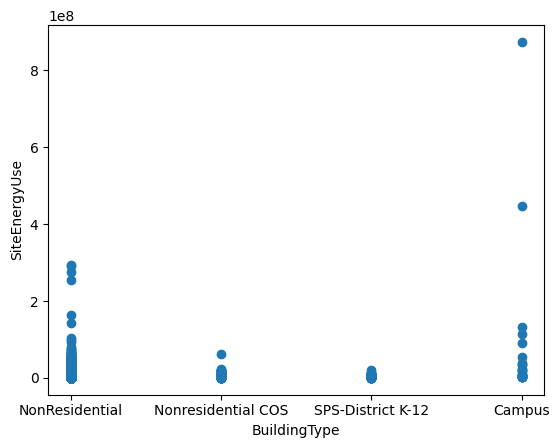

In [74]:
plt.plot(df_final['BuildingType'], df_final['SiteEnergyUse'],'o')
plt.xlabel('BuildingType')
plt.ylabel('SiteEnergyUse')
plt.show()

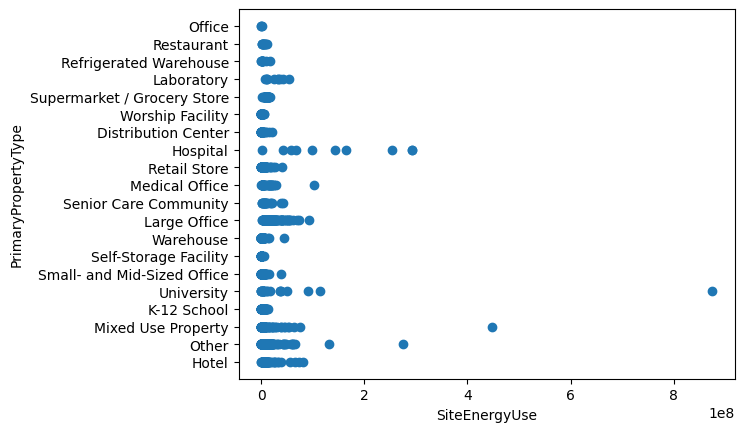

In [75]:
plt.plot(df_final['SiteEnergyUse'],df_final['PrimaryPropertyType'],'o')
plt.xlabel('SiteEnergyUse')
plt.ylabel('PrimaryPropertyType')
plt.show()

<Axes: xlabel='SiteEnergyUse', ylabel='PrimaryPropertyType'>

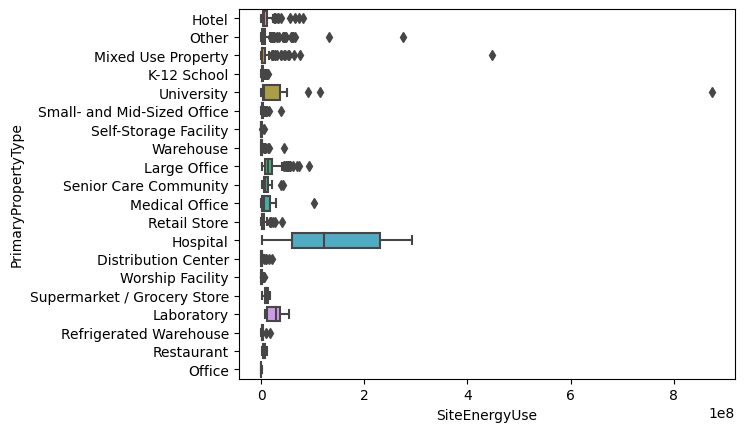

In [76]:
sns.boxplot(data=df_final, x="SiteEnergyUse", y="PrimaryPropertyType")

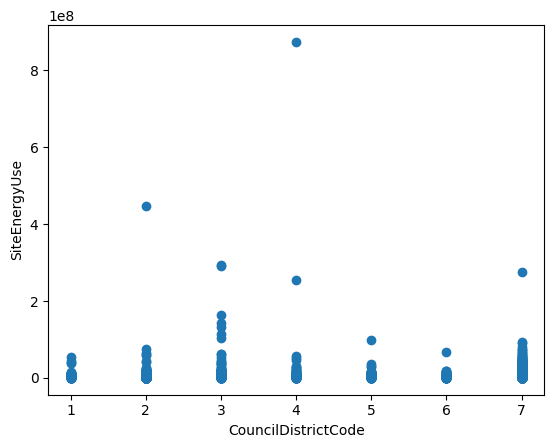

In [77]:
plt.plot(df_final['CouncilDistrictCode'], df_final['SiteEnergyUse'],'o')
plt.xlabel('CouncilDistrictCode')
plt.ylabel('SiteEnergyUse')
plt.show()

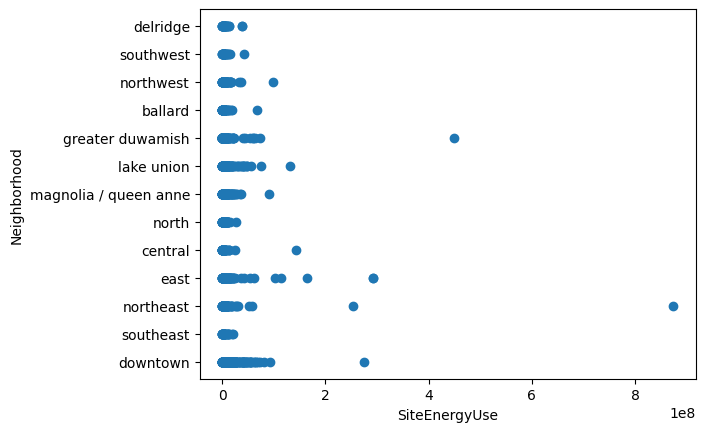

In [78]:
plt.plot(df_final['SiteEnergyUse'],df_final['Neighborhood'],'o')
plt.xlabel('SiteEnergyUse')
plt.ylabel('Neighborhood')
plt.show()

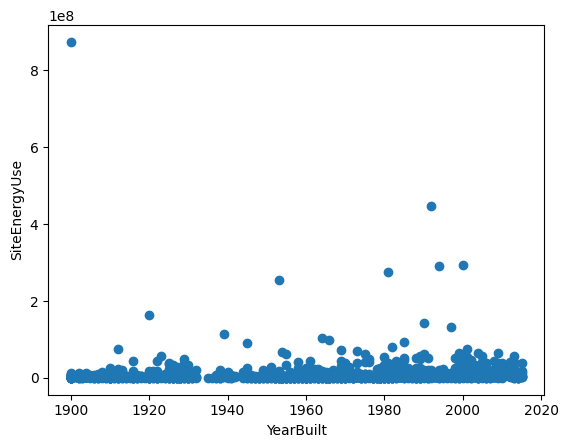

In [79]:
plt.plot(df_final['YearBuilt'], df_final['SiteEnergyUse'],'o')
plt.xlabel('YearBuilt')
plt.ylabel('SiteEnergyUse')
plt.show()

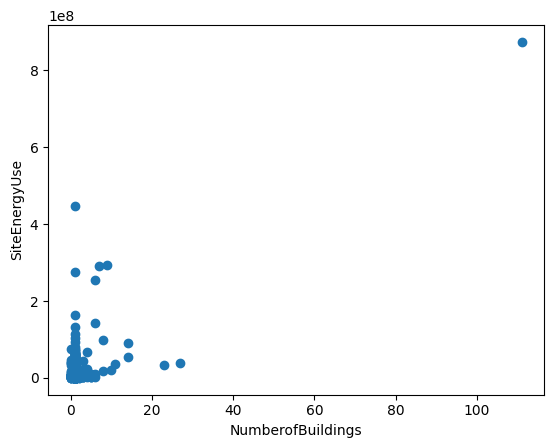

In [80]:
plt.plot(df_final['NumberofBuildings'], df_final['SiteEnergyUse'],'o')
plt.xlabel('NumberofBuildings')
plt.ylabel('SiteEnergyUse')
plt.show()

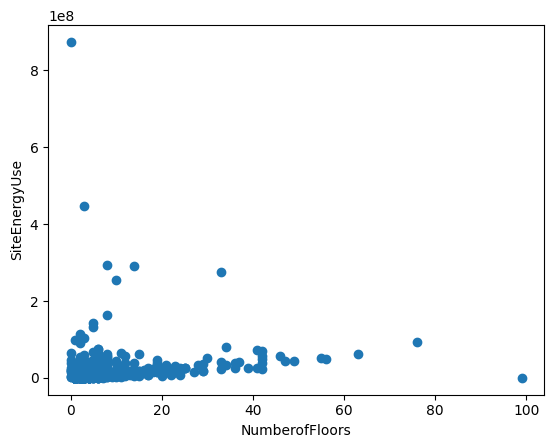

In [81]:
plt.plot(df_final['NumberofFloors'], df_final['SiteEnergyUse'],'o')
plt.xlabel('NumberofFloors')
plt.ylabel('SiteEnergyUse')
plt.show()

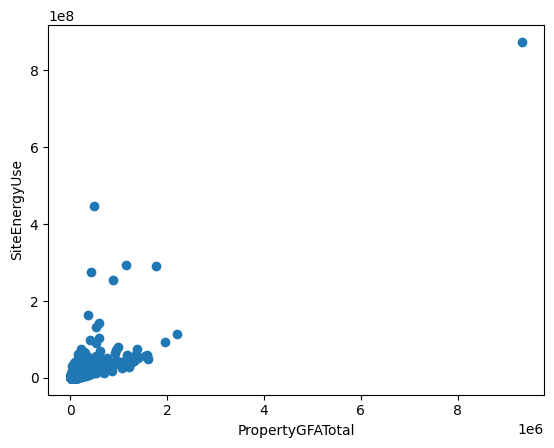

In [82]:
plt.plot(df_final['PropertyGFATotal'], df_final['SiteEnergyUse'],'o')
plt.xlabel('PropertyGFATotal')
plt.ylabel('SiteEnergyUse')
plt.show()

## Emissions de CO2

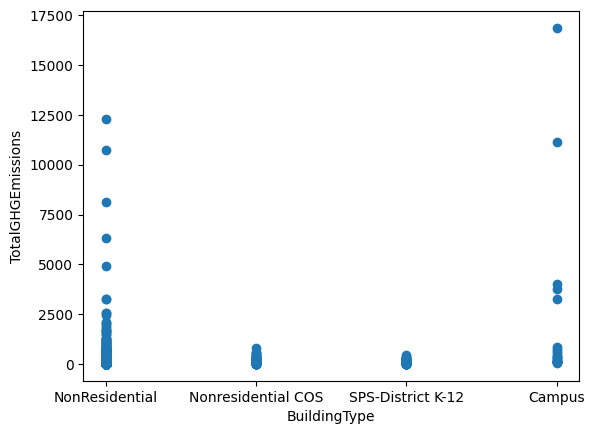

In [83]:
plt.plot(df_final['BuildingType'], df_final['TotalGHGEmissions'],'o')
plt.xlabel('BuildingType')
plt.ylabel('TotalGHGEmissions')
plt.show()

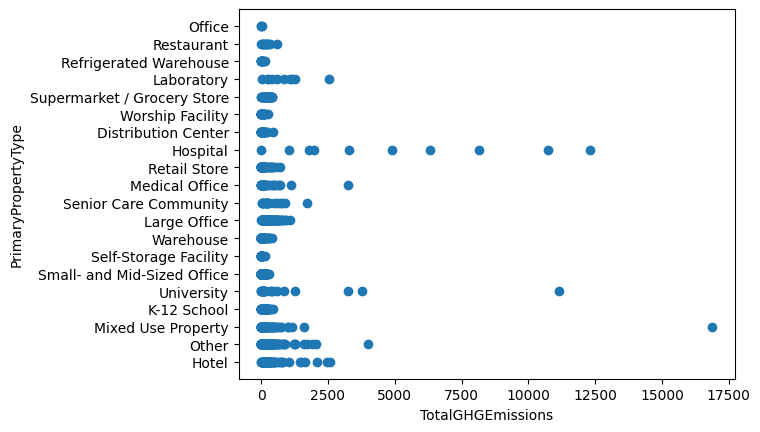

In [84]:
plt.plot(df_final['TotalGHGEmissions'],df_final['PrimaryPropertyType'],'o')
plt.xlabel('TotalGHGEmissions')
plt.ylabel('PrimaryPropertyType')
plt.show()

<Axes: xlabel='TotalGHGEmissions', ylabel='PrimaryPropertyType'>

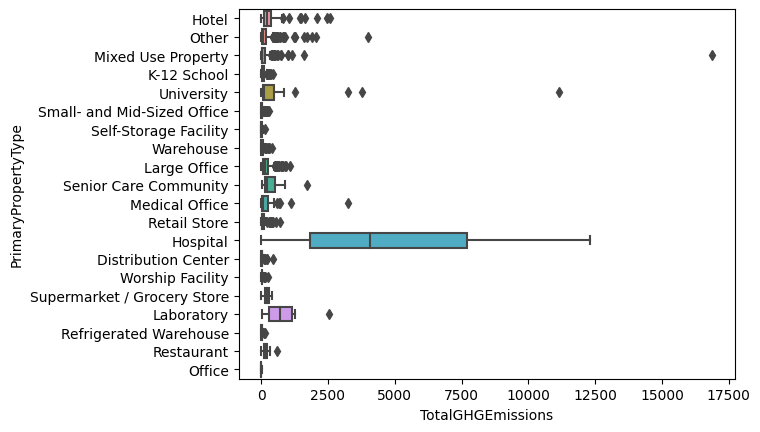

In [85]:
sns.boxplot(data=df_final, x="TotalGHGEmissions", y="PrimaryPropertyType")

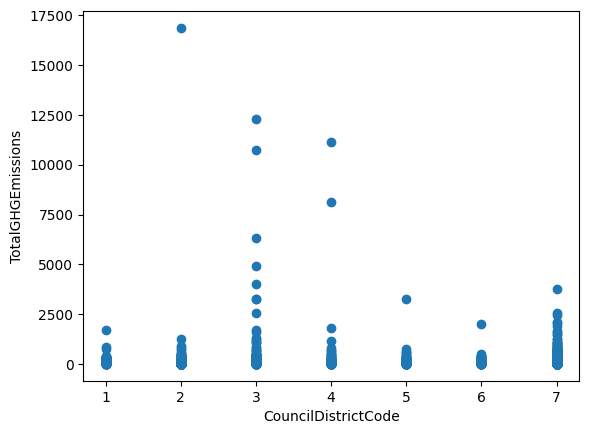

In [86]:
plt.plot(df_final['CouncilDistrictCode'], df_final['TotalGHGEmissions'],'o')
plt.xlabel('CouncilDistrictCode')
plt.ylabel('TotalGHGEmissions')
plt.show()

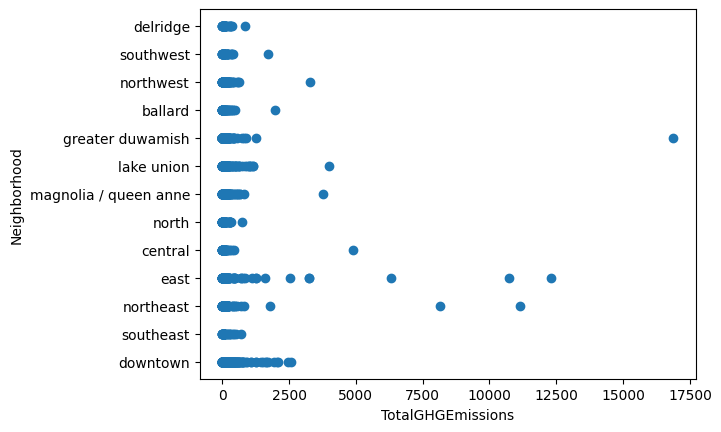

In [87]:
plt.plot(df_final['TotalGHGEmissions'],df_final['Neighborhood'],'o')
plt.xlabel('TotalGHGEmissions')
plt.ylabel('Neighborhood')
plt.show()

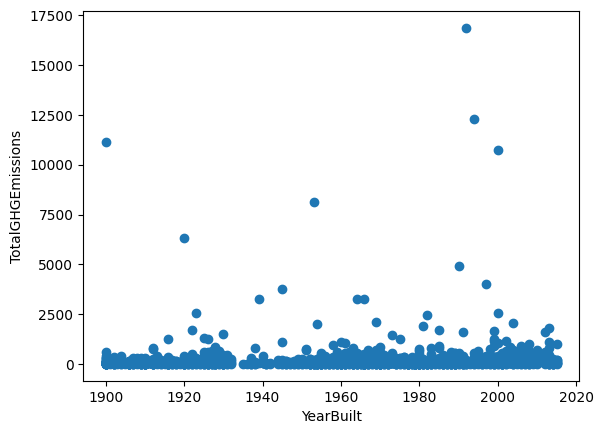

In [88]:
plt.plot(df_final['YearBuilt'], df_final['TotalGHGEmissions'],'o')
plt.xlabel('YearBuilt')
plt.ylabel('TotalGHGEmissions')
plt.show()

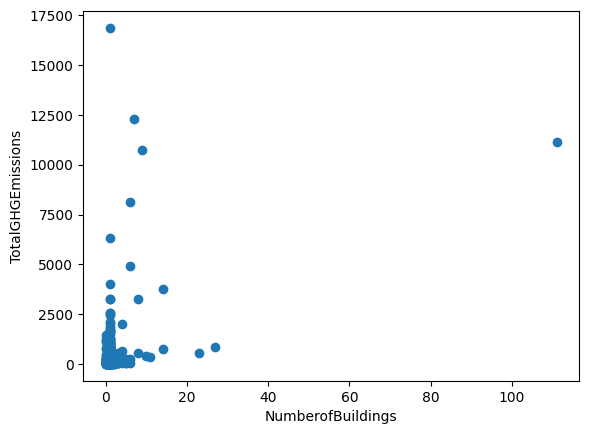

In [89]:
plt.plot(df_final['NumberofBuildings'], df_final['TotalGHGEmissions'],'o')
plt.xlabel('NumberofBuildings')
plt.ylabel('TotalGHGEmissions')
plt.show()

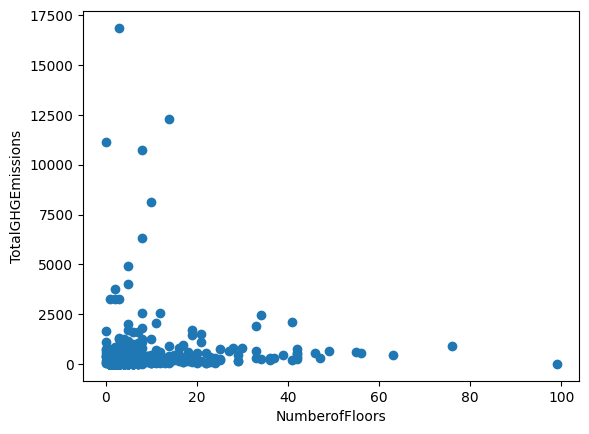

In [90]:
plt.plot(df_final['NumberofFloors'], df_final['TotalGHGEmissions'],'o')
plt.xlabel('NumberofFloors')
plt.ylabel('TotalGHGEmissions')
plt.show()

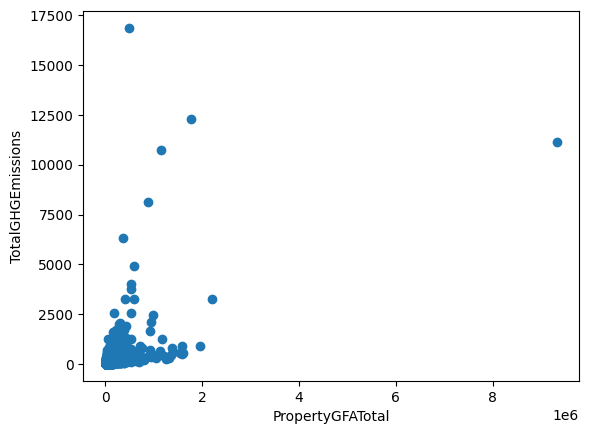

In [91]:
plt.plot(df_final['PropertyGFATotal'], df_final['TotalGHGEmissions'],'o')
plt.xlabel('PropertyGFATotal')
plt.ylabel('TotalGHGEmissions')
plt.show()

## Matrice de correlation

In [92]:
df_final2 = df_final[[
       'CouncilDistrictCode', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuildings',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity']]

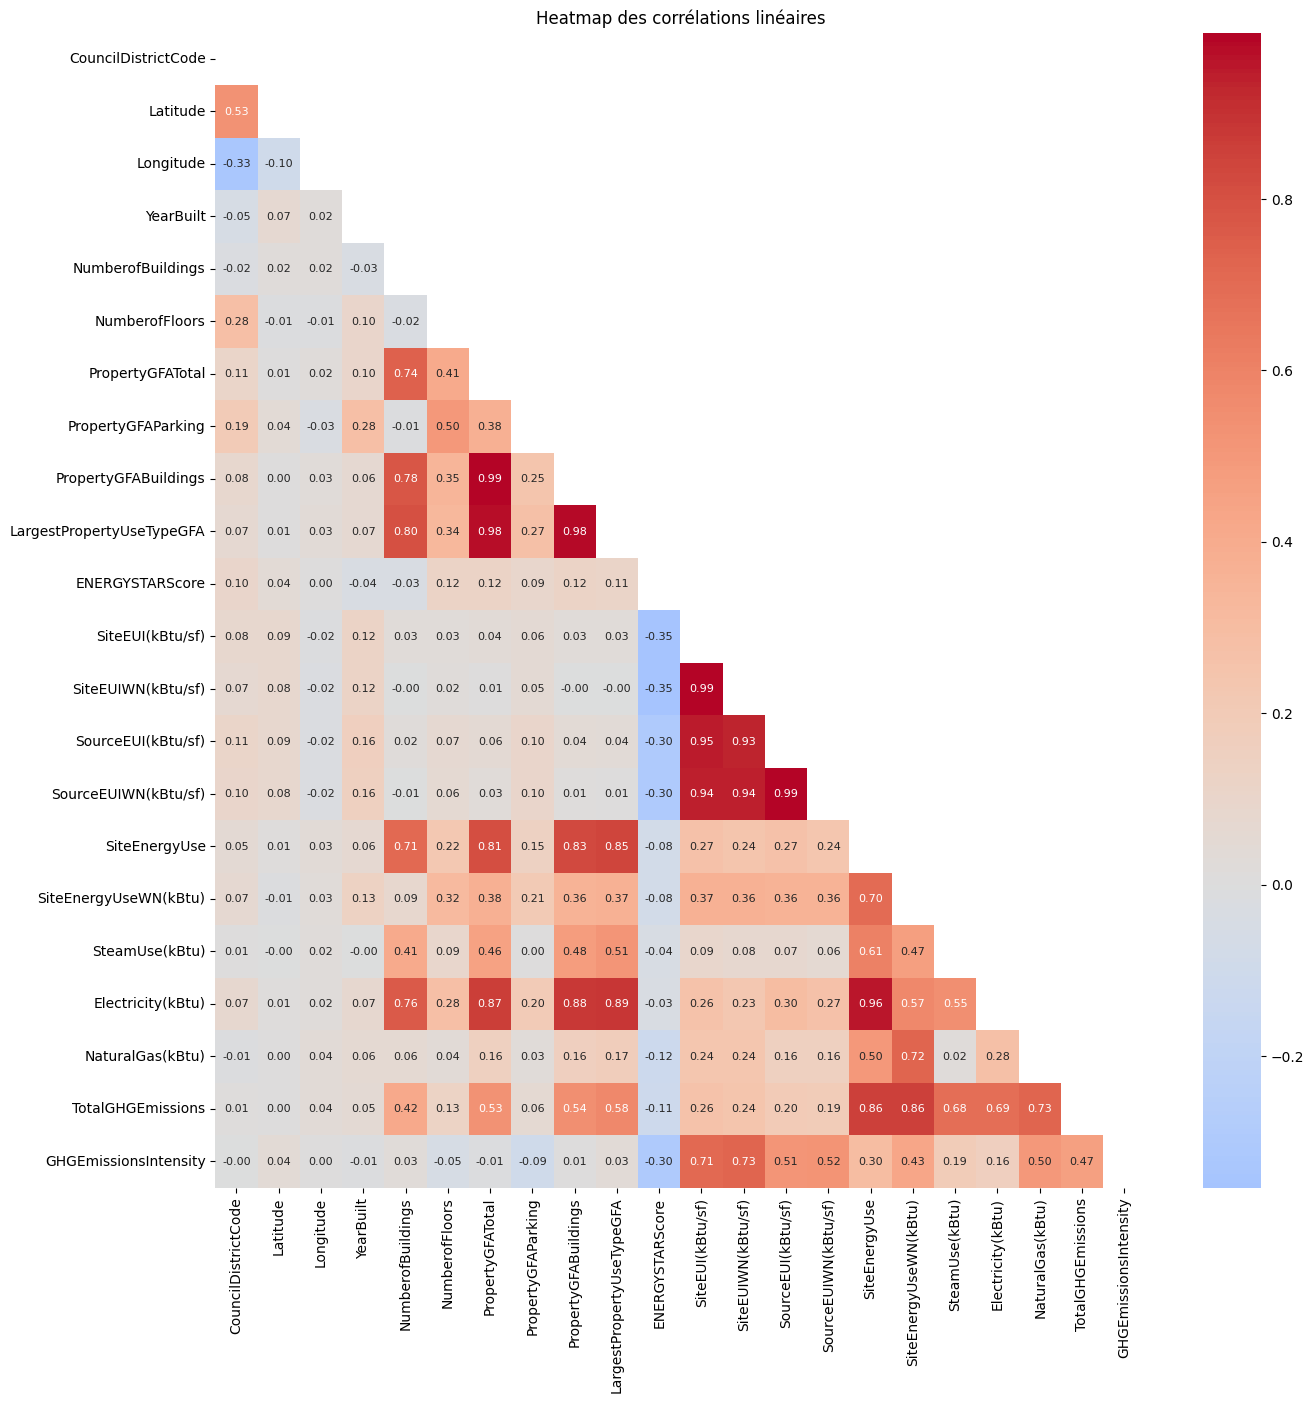

In [93]:
corr = df_final2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, mask=mask, center=0, cmap="coolwarm")
plt.title("Heatmap des corrélations linéaires")
plt.show()

## Features engineering

In [94]:
#getdummies PrimaryPropertyType  #(non utile si dummies largest/second/third)
PrimaryPropertyType_dummies = pd.get_dummies(df_final.PrimaryPropertyType, dtype = "int64")
#modification des espaces pour passer dans l'anova
PrimaryPropertyType_dummies.columns = PrimaryPropertyType_dummies.columns.map(lambda x: x.upper())
PrimaryPropertyType_dummies.columns = PrimaryPropertyType_dummies.columns.str.replace('/ ', '')
PrimaryPropertyType_dummies.columns = PrimaryPropertyType_dummies.columns.str.replace('-', '')
PrimaryPropertyType_dummies.columns = PrimaryPropertyType_dummies.columns.str.replace(' ', '_')

df_final = df_final.join(PrimaryPropertyType_dummies)

In [95]:
#getdummies Neighborhood
Neighborhood_dummies = pd.get_dummies(df_final.Neighborhood, dtype = "int64")
#modification des espaces pour passer dans l'anova
Neighborhood_dummies.columns = Neighborhood_dummies.columns.str.replace('/ ', '')
Neighborhood_dummies.columns = Neighborhood_dummies.columns.str.replace(' ', '_')

df_final = df_final.join(Neighborhood_dummies)

In [96]:
#getdummies LargestPropertyUseType
LargestPropertyUseType_dummies = pd.get_dummies(df_final.LargestPropertyUseType, dtype = "int64")

In [97]:
#getdummies SecondLargestPropertyUseType
SecondLargestPropertyUseType_dummies = pd.get_dummies(df_final.SecondLargestPropertyUseType, dtype = "int64")

In [98]:
#getdummies LargestPropertyUseType
ThirdLargestPropertyUseType_dummies = pd.get_dummies(df_final.ThirdLargestPropertyUseType, dtype = "int64")

In [99]:
LargestPropertyUseType_dummies = LargestPropertyUseType_dummies.mul(df_final.LargestPropertyUseTypeGFA, axis='index')

In [100]:
SecondLargestPropertyUseType_dummies = SecondLargestPropertyUseType_dummies.mul(df_final.SecondLargestPropertyUseTypeGFA, axis='index')

In [101]:
ThirdLargestPropertyUseType_dummies = ThirdLargestPropertyUseType_dummies.mul(df_final.ThirdLargestPropertyUseTypeGFA, axis='index')

In [102]:
df_dum = pd.DataFrame()
df_dum = df_dum.add(LargestPropertyUseType_dummies, fill_value=0).add(SecondLargestPropertyUseType_dummies, fill_value=0).add(ThirdLargestPropertyUseType_dummies, fill_value=0)

In [103]:
df_dum.fillna(0, inplace=True)

In [104]:
df_dum.sum().sort_values(ascending = False)

Office                                   6.430033e+07
Parking                                  2.361152e+07
College/University                       1.460482e+07
Non-Refrigerated Warehouse               1.208792e+07
K-12 School                              1.093825e+07
                                             ...     
Other - Technology/Science               1.554100e+04
Food Sales                               1.392600e+04
Convenience Store without Gas Station    9.707900e+03
Fast Food Restaurant                     1.070000e+03
Swimming Pool                            0.000000e+00
Length: 63, dtype: float64

In [105]:
bad_str = ['/','-',' ','(',')',',','&']
for bad in bad_str : 
    df_dum.columns = df_dum.columns.str.replace(bad, '')

In [106]:
df_final = df_final.join(df_dum)

## Anova

In [107]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [108]:
#boucle pour faciliter l'ajout des +
Lstr = df_final.columns
str2 = ""
for col in Lstr : 
    str2+= (" + " + col)
str2[2:]

' BuildingType + PrimaryPropertyType + PropertyName + Address + CouncilDistrictCode + Neighborhood + Latitude + Longitude + YearBuilt + NumberofBuildings + NumberofFloors + PropertyGFATotal + PropertyGFAParking + PropertyGFABuildings + ListOfAllPropertyUseTypes + LargestPropertyUseType + LargestPropertyUseTypeGFA + SecondLargestPropertyUseType + SecondLargestPropertyUseTypeGFA + ThirdLargestPropertyUseType + ThirdLargestPropertyUseTypeGFA + ENERGYSTARScore + SiteEUI(kBtu/sf) + SiteEUIWN(kBtu/sf) + SourceEUI(kBtu/sf) + SourceEUIWN(kBtu/sf) + SiteEnergyUse + SiteEnergyUseWN(kBtu) + SteamUse(kBtu) + Electricity(kBtu) + NaturalGas(kBtu) + ComplianceStatus + TotalGHGEmissions + GHGEmissionsIntensity + DISTRIBUTION_CENTER + HOSPITAL + HOTEL + K12_SCHOOL + LABORATORY + LARGE_OFFICE + MEDICAL_OFFICE + MIXED_USE_PROPERTY + OFFICE + OTHER + REFRIGERATED_WAREHOUSE + RESTAURANT + RETAIL_STORE + SELFSTORAGE_FACILITY + SENIOR_CARE_COMMUNITY + SMALL_AND_MIDSIZED_OFFICE + SUPERMARKET_GROCERY_STORE + U

In [109]:
# Anova Consommation d'énergie
#'SiteEnergyUse ~  CouncilDistrictCode + YearBuilt + NumberofBuildings + NumberofFloors + PropertyGFATotal + PropertyGFAParking + PropertyGFABuildings + LargestPropertyUseTypeGFA + ENERGYSTARScore + TotalGHGEmissions + GHGEmissionsIntensity + DISTRIBUTION_CENTER + HOSPITAL + HOTEL + K12_SCHOOL + LABORATORY + LARGE_OFFICE + MEDICAL_OFFICE + MIXED_USE_PROPERTY + OFFICE + OTHER + REFRIGERATED_WAREHOUSE + RESTAURANT + RETAIL_STORE + SELFSTORAGE_FACILITY + SENIOR_CARE_COMMUNITY + SMALL_AND_MIDSIZED_OFFICE + SUPERMARKET_GROCERY_STORE + UNIVERSITY + WAREHOUSE + WORSHIP_FACILITY + ballard + central + delridge + downtown + east + greater_duwamish + lake_union + magnolia_queen_anne + north + northeast + northwest + southeast + southwest - 1'

lm = ols('SiteEnergyUse ~  NumberofFloors + PropertyGFAParking + PropertyGFABuildings + LargestPropertyUseTypeGFA + TotalGHGEmissions + GHGEmissionsIntensity + HOSPITAL + HOTEL + K12_SCHOOL + MIXED_USE_PROPERTY + WAREHOUSE + east - 1', data = df_final).fit()
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          SiteEnergyUse   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              1934.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):                        0.00
Time:                        16:33:10   Log-Likelihood:                         -28432.
No. Observations:                1641   AIC:                                  5.689e+04
Df Residuals:                    1629   BIC:                                  5.695e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
NumberofFloors            -1.528e+05    3.6e+04     -4.241      0.000   -2.23e+05   -8.21e+04
PropertyGFAParking          -15.1417      5.755     -2.631      0.009     -26.429      -3.855
PropertyGFABuildings         15.3881      4.049      3.800      0.000       7.446      23.330
LargestPropertyUseTypeGFA    43.7230      4.269     10.242      0.000      35.350      52.096
TotalGHGEmissions          2.265e+04    437.982     51.716      0.000    2.18e+04    2.35e+04
GHGEmissionsIntensity       1.97e+05      9e+04      2.189      0.029    2.05e+04    3.73e+05
HOSPITAL                  -1.155e+07   3.07e+06     -3.765      0.000   -1.76e+07   -5.53e+06
HOTEL                     -3.391e+06   9.77e+05     -3.471      0.001   -5.31e+06   -1.47e+06
K12_SCHOOL                -3.548e+06   7.04e+05     -5.040      0.000   -4.93e+06   -2.17e+06
MIXED_USE_PROPERTY         2.295e+06   8.05e+05      2.851      0.004    7.16e+05    3.87e+06
WAREHOUSE                 -2.298e+06   6.01e+05     -3.821      0.000   -3.48e+06   -1.12e+06
east                      -2.467e+06    7.8e+05     -3.163      0.002      -4e+06   -9.37e+05
==============================================================================
Omnibus:                     2968.104   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8025809.919
Skew:                          12.281   Prob(JB):                         0.00
Kurtosis:                     344.725   Cond. No.                     6.44e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
# OLS A refaire sans les emissions de CO2(total et intensity)

#'SiteEnergyUse ~  CouncilDistrictCode + YearBuilt + NumberofBuildings + NumberofFloors + PropertyGFATotal + PropertyGFAParking + PropertyGFABuildings + LargestPropertyUseTypeGFA + ENERGYSTARScore + TotalGHGEmissions + GHGEmissionsIntensity + DISTRIBUTION_CENTER + HOSPITAL + HOTEL + K12_SCHOOL + LABORATORY + LARGE_OFFICE + MEDICAL_OFFICE + MIXED_USE_PROPERTY + OFFICE + OTHER + REFRIGERATED_WAREHOUSE + RESTAURANT + RETAIL_STORE + SELFSTORAGE_FACILITY + SENIOR_CARE_COMMUNITY + SMALL_AND_MIDSIZED_OFFICE + SUPERMARKET_GROCERY_STORE + UNIVERSITY + WAREHOUSE + WORSHIP_FACILITY + ballard + central + delridge + downtown + east + greater_duwamish + lake_union + magnolia_queen_anne + north + northeast + northwest + southeast + southwest - 1'

lm = ols('SiteEnergyUse ~  Latitude + NumberofBuildings + NumberofFloors + PropertyGFAParking + PropertyGFABuildings + LargestPropertyUseTypeGFA + ENERGYSTARScore + HOSPITAL + HOTEL + MEDICAL_OFFICE + MIXED_USE_PROPERTY + OTHER + RETAIL_STORE + SMALL_AND_MIDSIZED_OFFICE + SUPERMARKET_GROCERY_STORE + ballard + central + delridge + downtown + east + greater_duwamish + lake_union + magnolia_queen_anne + north + northeast + northwest + southeast + southwest - 1', data = df_final).fit()
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SiteEnergyUse   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     67.43
Date:                Thu, 03 Aug 2023   Prob (F-statistic):          2.38e-207
Time:                        16:33:11   Log-Likelihood:                -19275.
No. Observations:                1074   AIC:                         3.861e+04
Df Residuals:                    1046   BIC:                         3.874e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Latitude                  -5.246e+07   3.21e+07     -1.633      0.103   -1.16e+08    1.06e+07
NumberofBuildings          7.981e+06   1.21e+06      6.616      0.000    5.61e+06    1.03e+07
NumberofFloors            -2.151e+05   9.82e+04     -2.192      0.029   -4.08e+05   -2.25e+04
PropertyGFAParking          -70.5024     13.454     -5.240      0.000     -96.901     -44.103
PropertyGFABuildings        -30.6964      9.032     -3.399      0.001     -48.419     -12.974
LargestPropertyUseTypeGFA   135.4049     10.327     13.111      0.000     115.140     155.670
ENERGYSTARScore           -8.705e+04   1.74e+04     -5.016      0.000   -1.21e+05    -5.3e+04
HOSPITAL                   4.554e+07   6.58e+06      6.925      0.000    3.26e+07    5.84e+07
HOTEL                      3.872e+06      2e+06      1.936      0.053   -5.27e+04     7.8e+06
MEDICAL_OFFICE             6.197e+06    2.8e+06      2.215      0.027    7.06e+05    1.17e+07
MIXED_USE_PROPERTY         2.682e+07   3.14e+06      8.529      0.000    2.06e+07     3.3e+07
OTHER                      3.306e+07    4.7e+06      7.037      0.000    2.38e+07    4.23e+07
RETAIL_STORE                 3.2e+06   1.89e+06      1.691      0.091   -5.14e+05    6.91e+06
SMALL_AND_MIDSIZED_OFFICE  3.341e+06   1.27e+06      2.636      0.009    8.54e+05    5.83e+06
SUPERMARKET_GROCERY_STORE  8.706e+06   2.62e+06      3.329      0.001    3.57e+06    1.38e+07
ballard                    2.494e+09   1.53e+09      1.628      0.104   -5.11e+08     5.5e+09
central                     2.49e+09   1.53e+09      1.627      0.104   -5.12e+08    5.49e+09
delridge                   2.488e+09   1.53e+09      1.629      0.104    -5.1e+08    5.49e+09
downtown                   2.492e+09   1.53e+09      1.629      0.104    -5.1e+08    5.49e+09
east                       2.495e+09   1.53e+09      1.631      0.103   -5.07e+08     5.5e+09
greater_duwamish            2.49e+09   1.53e+09      1.629      0.104   -5.09e+08    5.49e+09
lake_union                 2.494e+09   1.53e+09      1.629      0.104    -5.1e+08     5.5e+09
magnolia_queen_anne        2.494e+09   1.53e+09      1.629      0.104    -5.1e+08     5.5e+09
north                      2.495e+09   1.53e+09      1.627      0.104   -5.13e+08     5.5e+09
northeast                  2.494e+09   1.53e+09      1.628      0.104   -5.12e+08     5.5e+09
northwest                  2.496e+09   1.53e+09      1.629      0.104   -5.12e+08     5.5e+09
southeast                  2.488e+09   1.53e+09      1.628      0.104    -5.1e+08    5.49e+09
southwest                  2.488e+09   1.53e+09      1.628      0.104    -5.1e+08    5.49e+09
==============================================================================
Omnibus:                     2039.388   Durbin-Watson:                   2.050
Prob(Omnibu

In [111]:
# Anova Emissions CO2
# 'TotalGHGEmissions ~ CouncilDistrictCode + YearBuilt + NumberofBuildings + NumberofFloors + PropertyGFATotal + PropertyGFAParking + PropertyGFABuildings + LargestPropertyUseTypeGFA + ENERGYSTARScore + SiteEnergyUse + DISTRIBUTION_CENTER + HOSPITAL + HOTEL + K12_SCHOOL + LABORATORY + LARGE_OFFICE + MEDICAL_OFFICE + MIXED_USE_PROPERTY + OFFICE + OTHER + REFRIGERATED_WAREHOUSE + RESTAURANT + RETAIL_STORE + SELFSTORAGE_FACILITY + SENIOR_CARE_COMMUNITY + SMALL_AND_MIDSIZED_OFFICE + SUPERMARKET_GROCERY_STORE + UNIVERSITY + WAREHOUSE + WORSHIP_FACILITY + ballard + central + delridge + downtown + east + greater_duwamish + lake_union + magnolia_queen_anne + north + northeast + northwest + southeast + southwest - 1'
lm = ols('TotalGHGEmissions ~ YearBuilt + NumberofBuildings + NumberofFloors + PropertyGFATotal + PropertyGFAParking + PropertyGFABuildings + LargestPropertyUseTypeGFA + SiteEnergyUse + HOSPITAL + HOTEL + east - 1', data = df_final).fit()
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      TotalGHGEmissions   R-squared (uncentered):                   0.882
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              1215.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):                        0.00
Time:                        16:33:11   Log-Likelihood:                         -11505.
No. Observations:                1641   AIC:                                  2.303e+04
Df Residuals:                    1631   BIC:                                  2.308e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
YearBuilt                     0.0491      0.005     10.665      0.000       0.040       0.058
NumberofBuildings           -77.5221      4.563    -16.989      0.000     -86.472     -68.572
NumberofFloors               -5.8787      1.351     -4.351      0.000      -8.529      -3.229
PropertyGFATotal             -0.0007   8.65e-05     -7.965      0.000      -0.001      -0.001
PropertyGFAParking           -0.0003      0.000     -2.291      0.022      -0.001   -4.15e-05
PropertyGFABuildings         -0.0004   9.55e-05     -4.188      0.000      -0.001      -0.000
LargestPropertyUseTypeGFA     0.0006      0.000      3.630      0.000       0.000       0.001
SiteEnergyUse              3.013e-05   4.52e-07     66.593      0.000    2.92e-05     3.1e-05
HOSPITAL                   1332.2701     95.869     13.897      0.000    1144.230    1520.310
HOTEL                       148.0712     32.203      4.598      0.000      84.908     211.235
east                        101.3401     25.843      3.921      0.000      50.652     152.029
==============================================================================
Omnibus:                     1542.353   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2273021.283
Skew:                          -3.197   Prob(JB):                         0.00
Kurtosis:                     185.216   Cond. No.                     3.57e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.29e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Anova2

In [113]:
def ols_auto(df_ols,list_cols,target,return_last_arg1=False):
    """
    df : DataFrame cleaned up ( no NaN and categorical must be encoded)
    list_cols : List of columns  ex : list(df_ols.columns)
    target : String of the col target ex:  'target'
    return_last_arg1 : renvoi du dernier arg1 (str) pour peaufiner l'anova
    """
    # conversion en liste
    if type(list_cols) != list :
      try:
        list_cols_asList = list(list_cols)
      except:
        print("Le second argument n'est pas convertissable en Liste Python ! ")
    else:
      list_cols_asList = list_cols.copy()

 

    # définition du df de travail
    df_test = df_ols[list_cols_asList].copy()

 

    # conversion en float des colonnes concernées
    for col in df_test.columns:
        try:
            df_test.loc[:,col] = df_test[col].astype(float,errors='ignore')
        except: # !!!  fonctionnalité d'erreur non testée pas testée
            print('Error : could not convert column : ',col,' to float')
    while True :
        # A REVOIR :  pour retirer un élément à chaque itération  ( utiliser regex ou autre ? )
        # construction de l'argument 1 ( chaine de caractere) dans la fonction ols
        str2=""
        for col in list_cols_asList :
            if col == target:
                pass
            else:
                str2+= (" + " + col )
        format_str= str2[2:]
        ols_arg1 = target +" ~ "+format_str + " -1 "
        # realisation de l'ols
        test_reg = ols(ols_arg1, data=df_test).fit()
        #print(i,test_reg.pvalues.idxmax(),test_reg.pvalues.max())
        # si p value max est inférieure à 5 % , break
        if  test_reg.pvalues.max() < 0.05:
            break
        else:
            list_cols_asList.remove(test_reg.pvalues.idxmax())
    if return_last_arg1 :
      return test_reg, ols_arg1
    return test_reg

In [ ]:
# 'CouncilDistrictCode + Latitude + Longitude + YearBuilt + NumberofBuildings + NumberofFloors + ENERGYSTARScore + ComplianceStatus + ballard + central + delridge + downtown + east + greater_duwamish + lake_union + magnolia_queen_anne + north + northeast + northwest + southeast + southwest + AdultEducation + AutomobileDealership + BankBranch + BarNightclub + CollegeUniversity + ConvenienceStorewithoutGasStation + Courthouse + DataCenter + DistributionCenter + EnclosedMall + FastFoodRestaurant + FinancialOffice + FireStation + FitnessCenterHealthClubGym + FoodSales + FoodService + HospitalGeneralMedicalSurgical + Hotel + K12School + Laboratory + Library + LifestyleCenter + ManufacturingIndustrialPlant + MedicalOffice + MovieTheater + MultifamilyHousing + Museum + NonRefrigeratedWarehouse + Office + Other + OtherEducation + OtherEntertainmentPublicAssembly + OtherLodgingResidential + OtherMall + OtherPublicServices + OtherRecreation + OtherRestaurantBar + OtherServices + OtherTechnologyScience + OtherUtility + OtherSpecialtyHospital + Parking + PerformingArts + PersonalServicesHealthBeautyDryCleaningetc + PoliceStation + PreschoolDaycare + PrisonIncarceration + RefrigeratedWarehouse + RepairServicesVehicleShoeLocksmithetc + ResidenceHallDormitory + ResidentialCareFacility + Restaurant + RetailStore + SelfStorageFacility + SeniorCareCommunity + SocialMeetingHall + StripMall + SupermarketGroceryStore + SwimmingPool + UrgentCareClinicOtherOutpatient + VocationalSchool + WholesaleClubSupercenter + WorshipFacility'

In [115]:
list_cols = list(df_final.columns)

In [117]:
ols_auto(df_final,list_cols,'SiteEnergyUse',return_last_arg1=False)

PatsyError: Error evaluating factor: NameError: name 'Electricity' is not defined
    SiteEnergyUse ~  BuildingType + PrimaryPropertyType + PropertyName + Address + CouncilDistrictCode + Neighborhood + Latitude + Longitude + YearBuilt + NumberofBuildings + NumberofFloors + PropertyGFATotal + PropertyGFAParking + PropertyGFABuildings + ListOfAllPropertyUseTypes + LargestPropertyUseType + LargestPropertyUseTypeGFA + SecondLargestPropertyUseType + SecondLargestPropertyUseTypeGFA + ThirdLargestPropertyUseType + ThirdLargestPropertyUseTypeGFA + ENERGYSTARScore + SiteEUI(kBtu/sf) + SiteEUIWN(kBtu/sf) + SourceEUI(kBtu/sf) + SourceEUIWN(kBtu/sf) + SiteEnergyUseWN(kBtu) + SteamUse(kBtu) + Electricity(kBtu) + NaturalGas(kBtu) + ComplianceStatus + TotalGHGEmissions + GHGEmissionsIntensity + DISTRIBUTION_CENTER + HOSPITAL + HOTEL + K12_SCHOOL + LABORATORY + LARGE_OFFICE + MEDICAL_OFFICE + MIXED_USE_PROPERTY + OFFICE + OTHER + REFRIGERATED_WAREHOUSE + RESTAURANT + RETAIL_STORE + SELFSTORAGE_FACILITY + SENIOR_CARE_COMMUNITY + SMALL_AND_MIDSIZED_OFFICE + SUPERMARKET_GROCERY_STORE + UNIVERSITY + WAREHOUSE + WORSHIP_FACILITY + ballard + central + delridge + downtown + east + greater_duwamish + lake_union + magnolia_queen_anne + north + northeast + northwest + southeast + southwest + AdultEducation + AutomobileDealership + BankBranch + BarNightclub + CollegeUniversity + ConvenienceStorewithoutGasStation + Courthouse + DataCenter + DistributionCenter + EnclosedMall + FastFoodRestaurant + FinancialOffice + FireStation + FitnessCenterHealthClubGym + FoodSales + FoodService + HospitalGeneralMedicalSurgical + Hotel + K12School + Laboratory + Library + LifestyleCenter + ManufacturingIndustrialPlant + MedicalOffice + MovieTheater + MultifamilyHousing + Museum + NonRefrigeratedWarehouse + Office + Other + OtherEducation + OtherEntertainmentPublicAssembly + OtherLodgingResidential + OtherMall + OtherPublicServices + OtherRecreation + OtherRestaurantBar + OtherServices + OtherTechnologyScience + OtherUtility + OtherSpecialtyHospital + Parking + PerformingArts + PersonalServicesHealthBeautyDryCleaningetc + PoliceStation + PreschoolDaycare + PrisonIncarceration + RefrigeratedWarehouse + RepairServicesVehicleShoeLocksmithetc + ResidenceHallDormitory + ResidentialCareFacility + Restaurant + RetailStore + SelfStorageFacility + SeniorCareCommunity + SocialMeetingHall + StripMall + SupermarketGroceryStore + SwimmingPool + UrgentCareClinicOtherOutpatient + VocationalSchool + WholesaleClubSupercenter + WorshipFacility -1
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               ^^^^^^^^^^^^^^^^^

In [ ]:
lm = ols('SiteEnergyUse ~  - 1', data = df_final).fit()
table = sm.stats.anova_lm(lm)
lm.summary()

In [ ]:
lm = ols('TotalGHGEmissions ~  - 1', data = df_final).fit()
table = sm.stats.anova_lm(lm)
lm.summary()